# Programming for Data Analysis
## Project 1 
## Title: IQ Test 
### Author: Andras Csullog

![IQ](https://www.arealme.com/newimg/tn_@2x_iq-2019.png)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
iq = np.random.normal(100 , 15 , 1000)
parentsiq =  random.choices(iq, weights=iq, k=1000)
parentsiq

[111.22217108837177,
 78.40154070018247,
 103.4899798425007,
 136.5566963962831,
 101.71941561929718,
 97.85930912789553,
 91.13162159407743,
 121.3353567840619,
 93.17432018137328,
 113.27397990100921,
 130.80001382963815,
 112.0301265317397,
 112.79726710638232,
 96.58244561259967,
 112.35863454807642,
 96.00796035832583,
 91.09351837041586,
 102.59685395879166,
 127.3873139473918,
 107.0143802407393,
 97.4472550275018,
 80.60272567451572,
 117.68044513844683,
 129.46292442613466,
 92.94017194351386,
 123.71587109220305,
 123.28513888715442,
 136.29246807150002,
 109.9045643546664,
 74.27694363409917,
 103.57292452068096,
 118.44069283153713,
 115.89558092694921,
 98.43773140523467,
 87.3263864096973,
 85.25628597875757,
 106.08938972208165,
 95.27472577269671,
 101.15953303598033,
 94.95636368093385,
 121.16573369626008,
 123.10345992356568,
 123.10345992356568,
 107.95445003708235,
 115.18850059159024,
 107.24524677160076,
 129.10894133509433,
 89.05148821279371,
 126.2736275735443

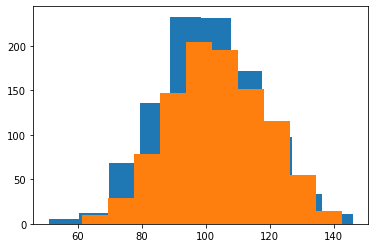

In [4]:
plt.hist(iq)
plt.hist(parentsiq)
plt.show()

In [5]:
gender = ["male", "female"]

In [6]:
gen = random.choices(gender, weights = [500, 500], k = 1000)

In [7]:
doby = np.random.randint(1900, 2000, 1000)

In [8]:
import pandas as pd
df = pd.DataFrame({"IQ_Score" : iq, "Parents' IQ_Score" : parents_iq,"Gender" : gen,"DOB_Year" : doby})
print(df)

NameError: name 'parents_iq' is not defined